## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [3]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [6]:
# load the data - it is available open source and online
import pandas as pd

data = pd.read_csv('/Users/shwetagarg/Downloads/Downloads/ML project_pycharm/ML deployment course/phpMYEkMl.csv')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [7]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [8]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [9]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [ ]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [10]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.55,C22,S,Master
2,1,0,female,2,1,2,151.55,C22,S,Miss
3,1,0,male,30,1,2,151.55,C22,S,Mr
4,1,0,female,25,1,2,151.55,C22,S,Mrs


In [11]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [ ]:
target = 'survived'

In [31]:
target = 'survived'
# let's identify the categorical variables
# we will capture those of type *object*

vars_cat = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)



# number of categorical variables
len(vars_cat)
# cast all variables as categorical
data[vars_cat] = data[vars_cat].astype('O')
# now let's identify the numerical variables

vars_num = [
    var for var in data.columns if var not in vars_cat and var != 'survived'
]

# number of numerical variables
len(vars_num)



3

### Find missing values in variables

In [15]:
# first in numerical variables
missing_num = data[vars_num].isnull().sum()
print('Missing values in numerical variables:')
print(missing_num[missing_num > 0])


Missing values in numerical variables:
Series([], dtype: int64)


In [32]:
# now in categorical variables
missing_cat = data[vars_cat].isnull().sum()
print('\nMissing values in categorical variables:')
print(missing_cat[missing_cat > 0])



Missing values in categorical variables:
age         263
fare          1
embarked      2
dtype: int64


### Determine cardinality of categorical variables

In [33]:
cardinality_cat = data[vars_cat].nunique()
print('Cardinality of categorical variables:')
print(cardinality_cat)

Cardinality of categorical variables:
sex               2
age              98
fare            281
embarked          3
title             5
Cabin_letter      9
dtype: int64


### Determine the distribution of numerical variables

Summary statistics of numerical variables:
            pclass        sibsp        parch
count  1309.000000  1309.000000  1309.000000
mean      2.294882     0.498854     0.385027
std       0.837836     1.041658     0.865560
min       1.000000     0.000000     0.000000
25%       2.000000     0.000000     0.000000
50%       3.000000     0.000000     0.000000
75%       3.000000     1.000000     0.000000
max       3.000000     8.000000     9.000000


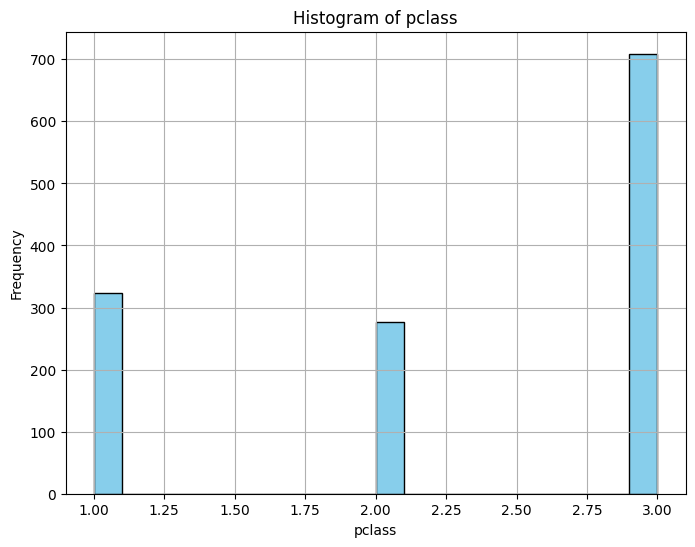

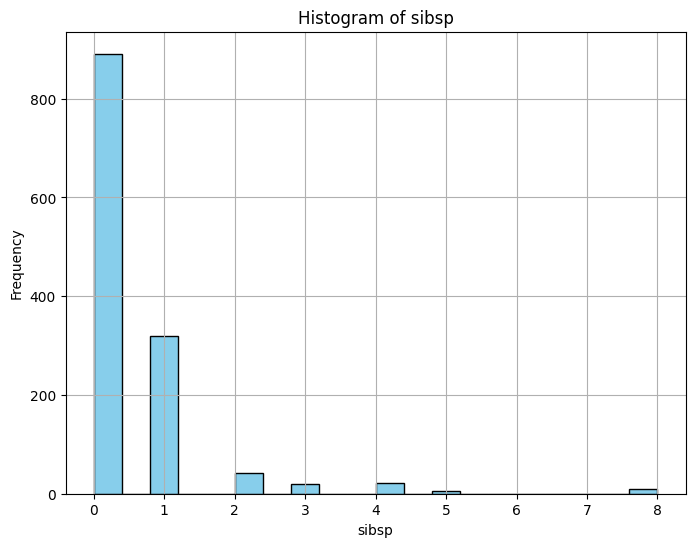

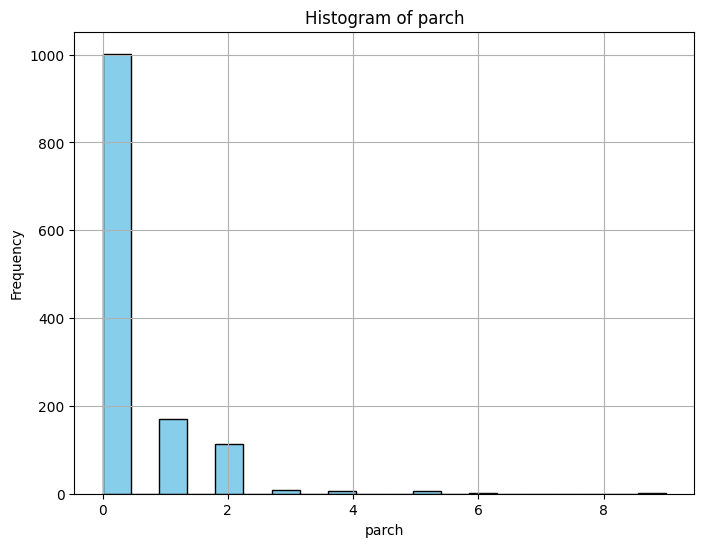

In [34]:
# Distribution of numerical variables using describe()
print('Summary statistics of numerical variables:')
print(data[vars_num].describe())

# Distribution of numerical variables using histograms
for var in vars_num:
    plt.figure(figsize=(8, 6))
    plt.hist(data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

In [40]:
data.columns


Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'title', 'Cabin_letter'],
      dtype='object')

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [41]:

import re

# Extract letter from Cabin variable and create a new column
data['Cabin_letter'] = data['Cabin_letter'].apply(lambda x: re.findall('[A-Za-z]', str(x)))

# Convert the list to a string (if more than one letter is present)
data['Cabin_letter'] = data['Cabin_letter'].apply(lambda x: ''.join(x))

# Drop the original Cabin variable
data.drop(columns=['Cabin_letter'], inplace=True)

# Display the updated DataFrame
print(data.head())


   pclass  survived     sex     age  sibsp  parch      fare embarked   title
0       1         1  female      29      0      0  211.3375        S    Miss
1       1         1    male  0.9167      1      2    151.55        S  Master
2       1         0  female       2      1      2    151.55        S    Miss
3       1         0    male      30      1      2    151.55        S      Mr
4       1         0  female      25      1      2    151.55        S     Mrs


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [42]:
# Import necessary libraries
from sklearn.impute import SimpleImputer

# Create a copy of the dataset to avoid modifying the original
data_filled = data.copy()

# List of numerical variables with missing values
vars_num_missing = [var for var in vars_num if data_filled[var].isnull().sum() > 0]

# Add binary missing indicator for numerical variables
for var in vars_num_missing:
    data_filled[var + '_missing'] = np.where(data_filled[var].isnull(), 1, 0)

# Fill missing values in original numerical variables with median
imputer = SimpleImputer(strategy='median')
data_filled[vars_num] = imputer.fit_transform(data_filled[vars_num])

# Display the updated DataFrame
print(data_filled.head())


   pclass  survived     sex     age  sibsp  parch      fare embarked   title
0     1.0         1  female      29    0.0    0.0  211.3375        S    Miss
1     1.0         1    male  0.9167    1.0    2.0    151.55        S  Master
2     1.0         0  female       2    1.0    2.0    151.55        S    Miss
3     1.0         0    male      30    1.0    2.0    151.55        S      Mr
4     1.0         0  female      25    1.0    2.0    151.55        S     Mrs


### Replace Missing data in categorical variables with the string **Missing**

In [46]:
# List of categorical variables with missing values
vars_cat_missing = [var for var in vars_cat if var != 'Cabin_letter' and data_filled[var].isnull().sum() > 0]

# Replace missing values in categorical variables with 'Missing'
data_filled[vars_cat_missing] = data_filled[vars_cat_missing].map(lambda x: 'Missing' if pd.isnull(x) else x)

# Display the updated DataFrame
print(data_filled.head())




   pclass  survived     sex     age  sibsp  parch      fare embarked   title
0     1.0         1  female      29    0.0    0.0  211.3375        S    Miss
1     1.0         1    male  0.9167    1.0    2.0    151.55        S  Master
2     1.0         0  female       2    1.0    2.0    151.55        S    Miss
3     1.0         0    male      30    1.0    2.0    151.55        S      Mr
4     1.0         0  female      25    1.0    2.0    151.55        S     Mrs


### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [48]:
# Function to find frequent labels
def find_frequent_labels(df, var, rare_perc):
    # Calculate the percentage of each label
    label_frequency = df[var].value_counts() / len(df)

    # Return the labels that are shared by more than the specified percentage
    frequent_labels = label_frequency[label_frequency > rare_perc].index

    return frequent_labels

# Replace rare labels in categorical variables with 'Rare'
for var in vars_cat:
    # Check if the variable is in the DataFrame
    if var in data_filled.columns:
        # Find the frequent labels for the current variable
        frequent_ls = find_frequent_labels(data_filled, var, 0.05)
        
        # Replace rare labels with 'Rare'
        data_filled[var] = np.where(data_filled[var].isin(frequent_ls), data_filled[var], 'Rare')

# Display the updated DataFrame
print(data_filled.head())



   pclass  survived     sex   age  sibsp  parch  fare embarked title
0     1.0         1  female  Rare    0.0    0.0  Rare        S  Miss
1     1.0         1    male  Rare    1.0    2.0  Rare        S  Rare
2     1.0         0  female  Rare    1.0    2.0  Rare        S  Miss
3     1.0         0    male  Rare    1.0    2.0  Rare        S    Mr
4     1.0         0  female  Rare    1.0    2.0  Rare        S   Mrs


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [49]:
# First, identify the categorical variables if not already done
vars_cat = [var for var in data_filled.columns if data_filled[var].dtype == 'O']

# Perform one-hot encoding
data_encoded = pd.get_dummies(data_filled, columns=vars_cat, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

# Save the encoded DataFrame if needed
data_encoded.to_csv('titanic_encoded.csv', index=False)


   pclass  survived  sibsp  parch  sex_male  age_Rare  embarked_Q  \
0     1.0         1    0.0    0.0     False      True       False   
1     1.0         1    1.0    2.0      True      True       False   
2     1.0         0    1.0    2.0     False      True       False   
3     1.0         0    1.0    2.0      True      True       False   
4     1.0         0    1.0    2.0     False      True       False   

   embarked_Rare  embarked_S  title_Mr  title_Mrs  title_Rare  
0          False        True     False      False       False  
1          False        True     False      False        True  
2          False        True     False      False       False  
3          False        True      True      False       False  
4          False        True     False       True       False  


### Scale the variables

- Use the standard scaler from Scikit-learn

In [50]:
from sklearn.preprocessing import StandardScaler

# Separate the target variable and features
target = 'survived'
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print(X_train_scaled.head())

# Optionally, save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')


     pclass     sibsp     parch  sex_male  age_Rare  embarked_Q  \
0  0.835808 -0.478911 -0.455423  0.761042  0.494921   -0.319539   
1 -1.542157 -0.478911 -0.455423 -1.313987  0.494921   -0.319539   
2  0.835808 -0.478911 -0.455423  0.761042 -2.020526    3.129507   
3  0.835808 -0.478911 -0.455423 -1.313987  0.494921   -0.319539   
4 -0.353174  0.434422 -0.455423  0.761042  0.494921   -0.319539   

   embarked_Rare  embarked_S  title_Mr  title_Mrs  title_Rare  
0      -0.043748    0.639650  0.869892  -0.435629   -0.275778  
1      -0.043748   -1.563355 -1.149569  -0.435629   -0.275778  
2      -0.043748   -1.563355  0.869892  -0.435629   -0.275778  
3      -0.043748    0.639650 -1.149569  -0.435629   -0.275778  
4      -0.043748    0.639650  0.869892  -0.435629   -0.275778  


['scaler.pkl']

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [51]:
# Import necessary libraries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize the logistic regression model
log_model = LogisticRegression(random_state=0)

# Fit the model on the training data
log_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
# For accuracy, we need the class labels
y_pred = log_model.predict(X_test_scaled)

# For ROC-AUC, we need the probabilities of the positive class (survived = 1)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC:', roc_auc)


Accuracy: 0.7824427480916031
ROC-AUC: 0.8330864197530864


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**